In [1]:
import swarms
from numpy import linspace, logspace, pi, array
import matplotlib.pyplot as plt

In [2]:
RHO=1500
M0 = 10 * 7.34767309e22; Dt = 100.; Dmax = 250000.; L_s = 10 * 3.828e26;
M_s = 1.86 * 1.989e30; M_pl = 1 * 1.89587112e27; a_pl = 50 * 1.496e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = 10 * 3.086e16
argv = [M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl]

In [53]:
t = 1e7
lamb = 1.65e-6
a_plv = linspace(2 * 1.496e11, 80 * 1.496e11, 500)
type_star = "M"

In [54]:
def Fstar(Ls, Bnu, Ts, dpl):
    sig = 5.670367e-8 #Stefan-Boltzmann constant
    part1 = Ls * Bnu
    part2 = 4 * sig * Ts ** 4 * dpl ** 2
    return part1 / part2

In [55]:
if type_star == "A":
    M_s = 2.1 * 1.989e30
    L_s = 20 * 3.828e26
elif type_star == "G":
    M_s = 1 * 1.989e30
    L_s = 1 * 3.828e26
elif type_star == "M":
    M_s = 0.21 * 1.989e30
    L_s = 0.0079 * 3.828e26

s = swarms.CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr,
                    d_pl, correction=True, alpha=1./1.2)
s.updateSwarm(t)
T_star = s.stellarTemp()
B_nu = s.computeBmu(lamb, T_star)
F_star = Fstar(L_s, B_nu, T_star, d_pl)/1e-26
print("Fstar")
print(F_star)

waverange = logspace(-7, -3, 200)
B_nu_list = s.computeBmu(waverange, T_star)
F_star_list = Fstar(L_s, B_nu_list, T_star, d_pl)/1e-26

fth_list = []
fs_list = []
if (a_plv is not None):
    for i in range(len(a_plv)):
        s2 = swarms.CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl,
                                a_plv[i], R_pl, eta, Nstr, d_pl,
                                rho=RHO, fQ=5, f_vrel=4/pi,
                                correction=True, alpha=1.2)

        s2.updateSwarm(t)

        F_th = s2.computeFth(array([lamb]), swarm=True)
        F_s = s2.computeFs(array([lamb]), 0.32, 0.08, swarm=True)
        
        fth_list.append(F_th[0]/1e-26)
        fs_list.append(F_s[0]/1e-26)
        
contrast_ratio_apl_th = array(fth_list) / F_star
contrast_ratio_apl_s = array(fs_list) / F_star

Fth_swarm = s.computeFth(waverange, swarm=True)/1e-26
Fs_swarm = s.computeFs(waverange, 0.32, 0.08, swarm=True)/1e-26

contrast_ratio_th = Fth_swarm / F_star_list
contrast_ratio_s = Fs_swarm / F_star_list

Fstar
0.8838701793835033


C:\Users\loloynage\Documents\CE-Irregular-Satellites\src\swarms.py:270: RuntimeWarning: overflow encountered in exp
  b = 1/(exp(h*(c/lamb)/(k_B*T)) - 1)


In [56]:
f_vrel = 4/pi
Qd = s.computeQd(s.Dc)
part1 = (M_s/1.989e30)**0.33 * f_vrel**0.55
part2 = (M_pl/5.972e24)**0.06 * Qd**0.15 * eta
part3 = t * (M0/5.972e24) / (RHO * (s.Dc/1000)) 

a_opt = 50 * part1 / part2 * part3**0.24 
print(a_opt)

16.978622682519894


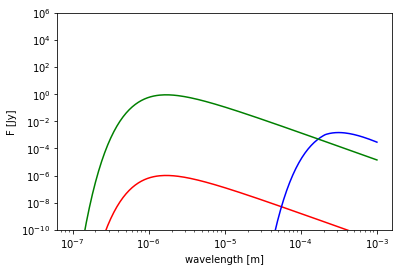

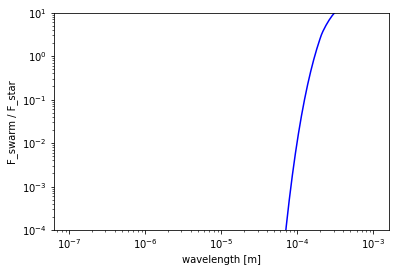

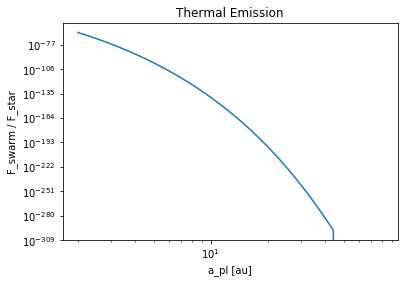

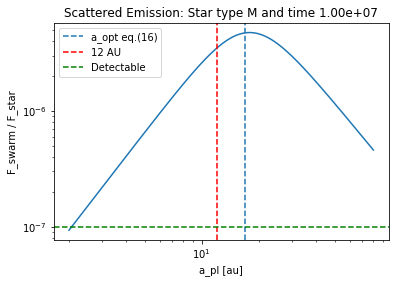

In [57]:
waverange = logspace(-7, -3, 200)

plt.figure(1)
plt.loglog(waverange, Fs_swarm, 'r')
plt.loglog(waverange, Fth_swarm, 'b')
plt.loglog(waverange, F_star_list, 'g')
plt.xlabel("wavelength [m]")
plt.ylabel("F [Jy]")
plt.ylim([10e-11, 10e5])
plt.show()

plt.figure(2)
#plt.loglog(waverange, contrast_ratio_s, 'r')
plt.loglog(waverange, contrast_ratio_th, 'b')
plt.xlabel("wavelength [m]")
plt.ylabel("F_swarm / F_star")
plt.ylim([10e-5, 10])
plt.show()

plt.figure(3)
plt.loglog(a_plv/1.496e11, contrast_ratio_apl_th)
plt.title("Thermal Emission")
plt.xlabel("a_pl [au]")
plt.ylabel("F_swarm / F_star")
plt.show()

plt.figure(4)
plt.loglog(a_plv/1.496e11, contrast_ratio_apl_s)
plt.axvline(a_opt, ls='--',label="a_opt eq.(16)")
plt.axvline(12, color='r', ls='--',label="12 AU")
plt.axhline(1e-7, color='g', ls='--',label="Detectable")
plt.legend()
plt.title("Scattered Emission: Star type "+str(type_star)+" and time {0:.2e}".format(t))
plt.xlabel("a_pl [au]")
plt.ylabel("F_swarm / F_star")
plt.show()